In [1]:
import numpy as np
np.random.seed(21)

In [2]:
## 
def random_plane(labels, space):
    l = len(labels)
    
    random_versor = np.random.uniform(size=l)
    random_versor /= np.linalg.norm(random_versor)

    mean_vect = np.zeros(5)

    for i in range(l):
        mean_vect[i] = (np.max(space[i]) - np.min(space[i]))/2

    print("Random", random_versor)
    print("Mean", mean_vect)
    return random_versor, mean_vect

In [5]:
labels = [1,2,3,4,5]
space = []
space.append([0,1,2])
space.append([0,1,2,3,4,5])
for i in range(3):
    space.append(np.linspace(0,1,10))

In [6]:
r = random_plane(labels, space)

Random [0.05154615 0.30687322 0.67401666 0.31280466 0.59247499]
Mean [1.  2.5 0.5 0.5 0.5]


In [7]:
def target_cast (inputs, r_plane):
    targets = []
    for i in range(len(inputs)):
        target =  np.sign(np.dot(inputs[i] - r_plane[1], r_plane[0]))
        if target < 0: target = 0
        targets.append(int(target))
    return targets 

In [8]:
inputs = []
inputs.append([1,2,3]*10)
inputs.append([1,2,3,4,5,6]*5)
for i in range(3):
    inputs.append(np.linspace(0,1,30))

inputs = np.asarray(inputs).T
print(np.shape(inputs))

#target_cast(inputs ,r)

(30, 5)


In [52]:
def target_cast(inputs, r_plane, irrelevant_components=0, _plot=False):
    targets = []
    #print(inputs[0])
    #print(len(r_plane))

    admitted = np.ones(len(r_plane[0]))
    admitted[irrelevant_components] = 0
    for i in range(len(inputs)):
        
        target =  (np.dot(inputs[i] - r_plane[1]*admitted, r_plane[0]*admitted))

        if target < 0: target = 0
        else: target = 1
        targets.append(int(target))
    if _plot:
        x = np.linspace(-1, 4, 10**3)
        y = - r_plane[0][2]/r_plane[0][1]*x
        
        fig  = plt.figure()
        mask = (np.array(targets) > 0)
        
        
        fig.add_subplot(1,2,1)
        plt.plot(x,y, color='black')
        print(len(mask),(len(inputs)))
        plt.plot(inputs[mask][:,1], inputs[mask][:,2], 'b.', alpha=0.5)
        
        fig.add_subplot(1,2,2)
        plt.plot(x,y)
        plt.plot(inputs[~mask][:,1], inputs[~mask][:,2], 'r.', alpha=0.5)
        
    return np.array(targets, dtype = np.int)

def random_plane(labels, space, irrelevant_components=[0,3,4,5],_plot=False):
    print(len(labels))
    l = len(labels)

    random_versor = np.random.uniform(size=l)
    random_versor /= np.linalg.norm(random_versor)

    mean_vect = np.zeros(l)

    for i in range(l):
        mean_vect[i] = np.mean(space[:,i])
        
    print("Random", random_versor)
    print("Mean", mean_vect)

    
    if _plot:
        f = plt.figure(figsize=(18, 10))  # plot the calculated values
        for i in range(l):
            f.add_subplot(2, 3, i+1)
            z = space[:,i]
            plt.hist(z, int(len(z)/100), label='component-%i'%i)
            plt.legend()
        plt.show()

    return [random_versor, mean_vect]

In [53]:
import numpy as np
import matplotlib.pyplot as plt

N = 10**5
label_idx = [0,1,2,3,4,5]

input = np.zeros((N,6))
input[:,0] = np.random.randint(0,3,N)
input[:,1:] = np.random.normal(1, 2, size=(N,5))

6
Random [0.60030936 0.52333616 0.19691368 0.34998774 0.38716994 0.2336257 ]
Mean [0.99813    0.99902947 0.99791642 1.01088072 1.00604863 0.9962471 ]
100000 100000


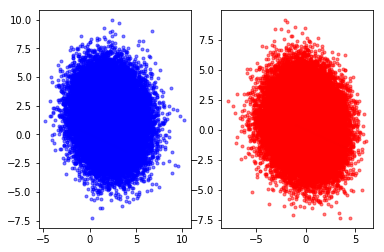

In [54]:
y = target_cast(input, r_plane=random_plane(label_idx, input, irrelevant_components=[0,3,4,5]), _plot=True)

In [17]:
len(y[y==0])/len(y)


0.49901

In [37]:
import torch
from sklearn.linear_model import LogisticRegression

In [38]:
in_data = input
y = target_cast(input, r_plane=random_plane(label_idx, input))
lr = LogisticRegression()
lr.fit(in_data, y)
y_pred1 = lr.predict_proba(in_data)            
y_pred1 = torch.tensor(y_pred1, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)
#y = torch.randint(low=0, high=1, size=(N,) )

torch.nn.CrossEntropyLoss(reduction='mean')(y_pred1, y)

6
Random [0.56867597 0.46563253 0.20038107 0.33545856 0.28420697 0.47574716]
Mean [5.00165462 1.00433513 0.99153517 0.99444646 1.00565136 1.00415663]


/home/emanuele/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


tensor(0.32)

In [39]:
torch.set_printoptions(precision=2, sci_mode=False)
y_pred1.to(dtype=torch.float)

tensor([[    0.00,     1.00],
        [    1.00,     0.00],
        [    0.00,     1.00],
        ...,
        [    0.97,     0.03],
        [    0.00,     1.00],
        [    0.00,     1.00]])

In [40]:
forward = torch.argmax(y_pred1, dim=1 ) 
len(forward[torch.abs(y-forward) == 1])

80

In [47]:
import torch

In [48]:

classification = torch.nn.Linear(10, 2)
optim = torch.optim.SGD(classification.params(), lr = 0.01, momentum=0.9)

loss = torch.nn.CrossEntropyLoss(reduction="sum")




AttributeError: 'Linear' object has no attribute 'params'

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def target_cast(labels, inputs, r_plane, irrelevant_components=[0], _plot=False):
    
    l = len(labels)
    
    targets = []
    admitted = np.ones(len(r_plane[0]))
    admitted[irrelevant_components] = 0
    print([iter for iter, i in enumerate(admitted) if i == 1 ])
    for i in range(len(inputs)):
        guess =  (np.dot(inputs[i] - r_plane[1]*admitted, (r_plane[0]*admitted) ))
        if guess < 0: target = 1
        else: target = 0
        if np.random.uniform() > 0.9:
            target = (target+1)%2


        targets.append((target))
    for i in irrelevant_components:
        labels.remove(i)
    
    if _plot and len(labels) == 2:
        f = plt.figure(figsize=(18, 10))
        mask = (np.array(targets, dtype=np.int) > 0)
        
        f.add_subplot(2,1,1)
        plt.plot(inputs[:,labels[0]][mask],   inputs[:,labels[1]][mask], 'r.', label='classified 1' )
        x = np.linspace(np.min(inputs[:,labels[0]]), np.max(inputs[:,labels[0]]))
        y = -r_plane[0][labels[0]]/r_plane[0][labels[1]]*(x - r_plane[1][labels[0]]) + r_plane[1][labels[1]] 
        plt.plot(x,y, color='black', label='separation plane')
        plt.legend()
        plt.xlim(x[0], x[-1])
        plt.ylim(np.min(inputs[:,labels[1]]), np.max(inputs[:,labels[1]]) )
        
        f.add_subplot(2,1,2)
        plt.plot(inputs[:,labels[0]][~mask], inputs[:,labels[1]][~mask], 'b.', label='classified 0' )
        x = np.linspace(np.min(inputs[:,labels[0]]), np.max(inputs[:,labels[0]]))
        y = -r_plane[0][labels[0]]/r_plane[0][labels[1]]*(x - r_plane[1][labels[0]]) + r_plane[1][labels[1]] 
        plt.plot(x,y, color='black', label='separation plane')
        plt.legend()
        plt.xlim(x[0], x[-1])
        plt.ylim(np.min(inputs[:,labels[1]]), np.max(inputs[:,labels[1]]) )
        
        plt.show()
    return np.array(targets, dtype=np.int)


def random_plane(labels, space, _plot=False):
    l = len(labels)

    random_versor = np.random.uniform(size=l)
    random_versor /= np.linalg.norm(random_versor)

    mean_vect = np.mean(space, axis=0)
    
    return [random_versor, mean_vect]


[2, 3]


/home/emanuele/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


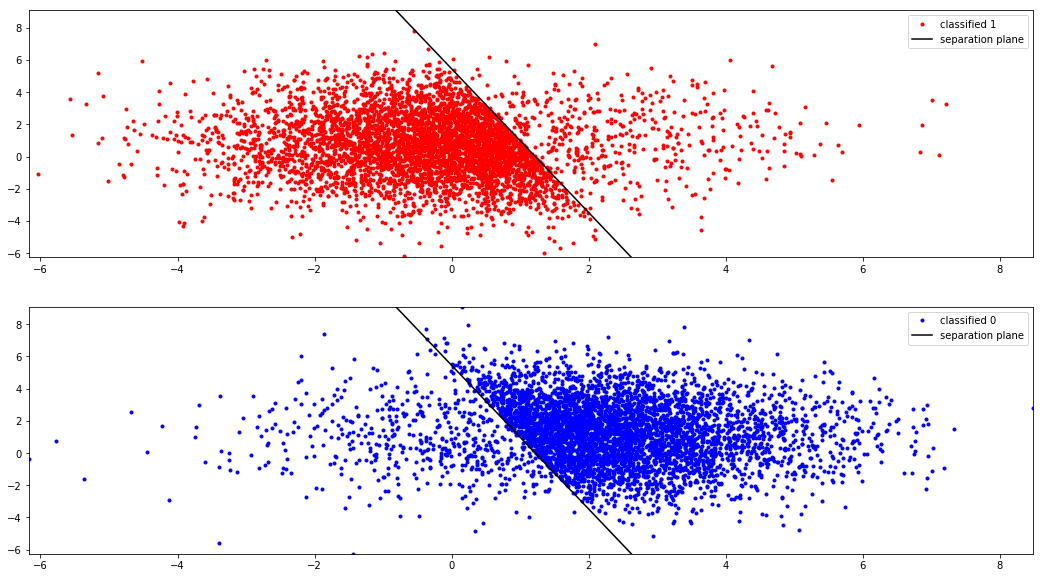

/home/emanuele/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [44]:
import numpy as np
import matplotlib.pyplot as plt

N = 10**4
label_idx = [0,1,2,3,4]

input = np.zeros((N,5))
input[:,0] = np.zeros(N)
input[:,1:] = np.random.normal(1, 2, size=(N,4))

r_plane = random_plane(label_idx, input, _plot=True)
random_v = r_plane[0] ; mean_v = r_plane[1]

_ = target_cast(label_idx, input, r_plane, irrelevant_components=[0,1,4], _plot=True)

[3, 4]


/home/emanuele/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


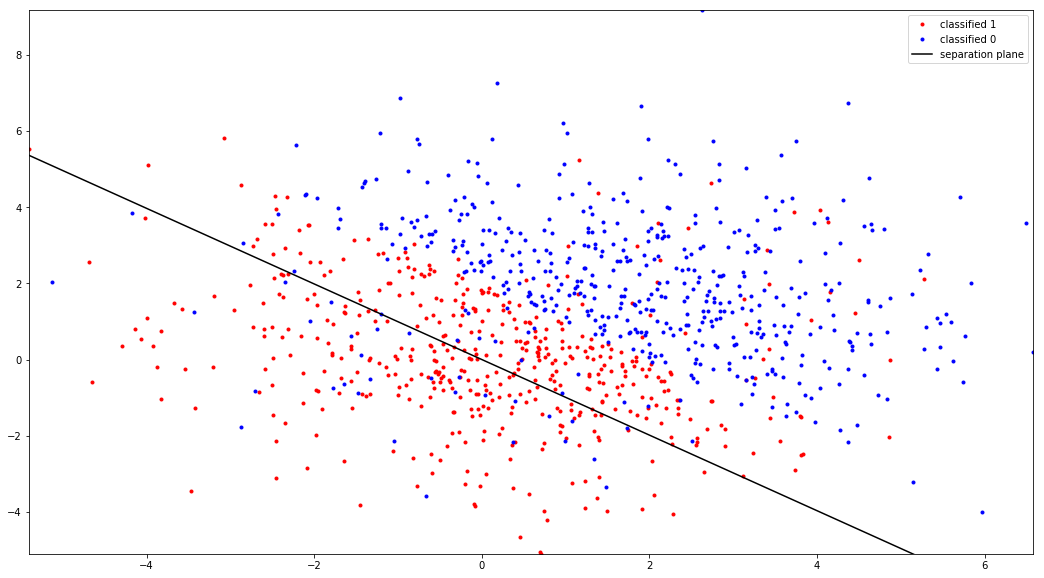

/home/emanuele/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [29]:
_ = target_cast(label_idx, input, r_plane, irrelevant_components=[0,1,2], _plot=True)